In [1]:
import pandas as pd
# Load cleaned data
df = pd.read_csv('/content/sample_data/heart_disease.csv')


In [6]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

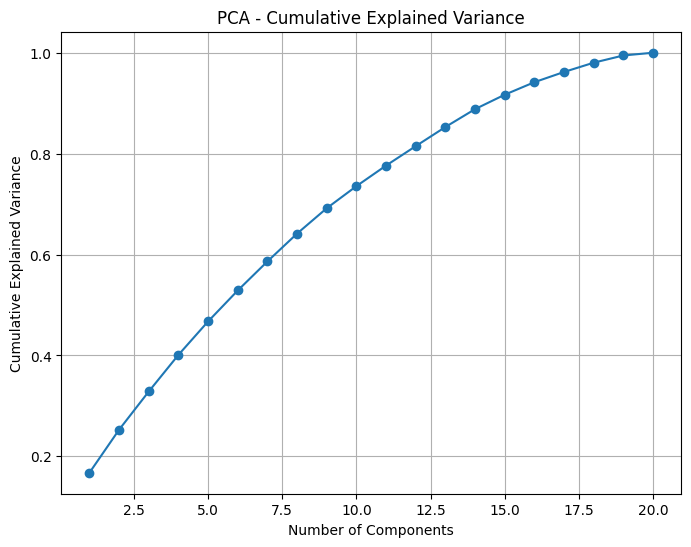

In [7]:
X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['target']
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1, X_scaled.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [9]:
cov_matrix = np.cov(X_scaled.T)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Check results
print("Eigenvalues:", eigenvalues[:5])

Eigenvalues: [3.36149275 1.7131384  0.10894703 1.518428   1.45731562]


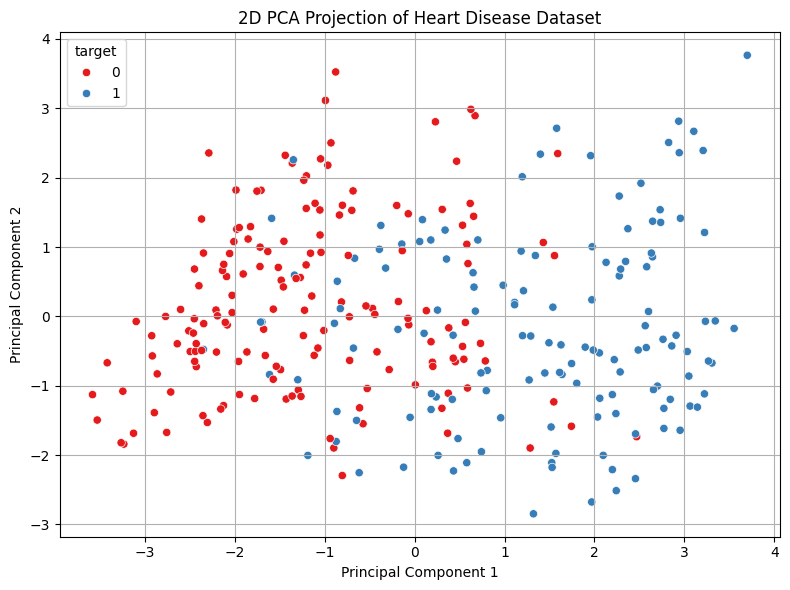

In [11]:
# visualization
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_scaled)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=y, palette='Set1')
plt.title("2D PCA Projection of Heart Disease Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Keep enough components to retain 95% variance
pca = PCA(n_components=0.95)
X_reconstructed = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"PCA-reduced shape: {X_reconstructed.shape}")


Original shape: (297, 20)
PCA-reduced shape: (297, 17)


In [13]:
# Save the reduced dataset to CSV
df_pca = pd.DataFrame(X_reconstructed)
df_pca['target'] = y.values
df_pca.to_csv("pca_transformed_data.csv", index=False)
